In [1]:
using Revise

In [47]:
using MeshCatMechanisms
using MeshCat
using RigidBodyDynamics
using Flux
using ProgressMeter
using MLDataPattern
using JLD2
using Plots; gr()
using LCPSim
using LearningMPC
using LearningMPC.Models
using DataFrames

In [4]:
robot = BoxAtlas()
mvis = MechanismVisualizer(robot)
IJuliaCell(mvis)

Listening on 127.0.0.1:7000...
zmq_url=tcp://127.0.0.1:6000
web_url=http://127.0.0.1:7000/static/


MeshCat.IJuliaCell(MeshCat.ViewerWindow(ZMQ.Context(Ptr{Void} @0x0000000007112500, WeakRef[WeakRef(ZMQ.Socket(Ptr{Void} @0x00000000071d18a0, Base.Filesystem._FDWatcher(Ptr{Void} @0x000000000712c2b0, 72, (1, 0), Condition(Any[]), (false, false), 0)))]), ZMQ.Socket(Ptr{Void} @0x00000000071d18a0, Base.Filesystem._FDWatcher(Ptr{Void} @0x000000000712c2b0, 72, (1, 0), Condition(Any[]), (false, false), 0)), "http://127.0.0.1:7000/static/", "tcp://127.0.0.1:6000", MeshCat.ZMQServer.ZMQWebSocketBridge(ip"127.0.0.1", Set{WebSockets.WebSocket}(), MeshCat.SceneTrees.SceneNode(Nullable{Array{UInt8,1}}(), Nullable{Array{UInt8,1}}(), Dict("meshcat"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x68, 0xa8, 0x2f, 0x6d, 0x65, 0x73, 0x68, 0x63, 0x61, 0x74], Dict("world"=>MeshCat.SceneTrees.SceneNode(#NULL, #NULL, Dict("root"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x77, 0x6f, 0x72, 0x6c, 0x64, 0x2f, 0x72, 0x6f, 0x6f, 0x74], Dict("floor"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x72, 0x6f, 0x6f, 0x74, 0x2f, 0x66, 0x6c, 0x6f, 0x6f, 0x72], Dict("wall"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x66, 0x6c, 0x6f, 0x6f, 0x72, 0x2f, 0x77, 0x61, 0x6c, 0x6c], Dict("after_floor_to_wall"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x6f, 0x72, 0x5f, 0x74, 0x6f, 0x5f, 0x77, 0x61, 0x6c, 0x6c], Dict("geometry_2"=>MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x32], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x32], Dict{String,MeshCat.SceneTrees.SceneNode}()))))),"after_root_to_floor"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x74, 0x5f, 0x74, 0x6f, 0x5f, 0x66, 0x6c, 0x6f, 0x6f, 0x72], Dict("geometry_1"=>MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x31], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x31], Dict{String,MeshCat.SceneTrees.SceneNode}()))))),"floating_base_dummy"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x62, 0x61, 0x73, 0x65, 0x5f, 0x64, 0x75, 0x6d, 0x6d, 0x79], Dict("pelvis"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x6d, 0x6d, 0x79, 0x2f, 0x70, 0x65, 0x6c, 0x76, 0x69, 0x73], Dict("after_floating_base_dummy_to_pelvis"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x5f, 0x74, 0x6f, 0x5f, 0x70, 0x65, 0x6c, 0x76, 0x69, 0x73], Dict("geometry_3"=>MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x33], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x33], Dict{String,MeshCat.SceneTrees.SceneNode}()))),"l_hand_mount_dummy"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x6f, 0x75, 0x6e, 0x74, 0x5f, 0x64, 0x75, 0x6d, 0x6d, 0x79], Dict("l_hand_mount"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x68, 0x61, 0x6e, 0x64, 0x5f, 0x6d, 0x6f, 0x75, 0x6e, 0x74], Dict("after_pelvis_to_l_hand_mount_extension"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x5f, 0x65, 0x78, 0x74, 0x65, 0x6e, 0

In [7]:
@load "boxatlas.jld2" datasets net lqrsol mpc_params
mpc_params_data = mpc_params
mpc_params = MPCParams(robot)
mpc_params.Δt = mpc_params_data["Δt"]
mpc_params.horizon = mpc_params_data["horizon"]
net_cost = LearningMPC.LearnedCost(lqrsol, net)
net_mpc_params = MPCParams(robot)
net_mpc_params.horizon = 1
net_mpc_controller = MPCController(robot, net_mpc_params, net_cost, [lqrsol]);
full_mpc_controller = MPCController(robot, mpc_params, lqrsol, [lqrsol, net_mpc_controller]);
lqr_mpc_controller = MPCController(robot, (p = MPCParams(robot); p.horizon=1; p), lqrsol, [lqrsol])

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


(::MPCController) (generic function with 1 method)

In [42]:
x0 = nominal_state(robot)
x_init = nominal_state(robot)
set_velocity!(x0, findjoint(mechanism(robot), "floating_base"), [-5, 0, 0])
results = LCPSim.simulate(x0, lqr_mpc_controller, environment(robot), 0.01, 200, 
mpc_params.lcp_solver);

In [44]:
playback(mvis, results, 0.01)

In [82]:
table = LearningMPC.run_evaluations(
    lqr_mpc_controller,
    "lqr_mpc",
    robot,
    lqrsol,
    [(1, [0])],
    [(1, linspace(-5, 5, 11)), (3, linspace(-10, 10, 11))];
)

append!(table, 
    LearningMPC.run_evaluations(
    net_mpc_controller,
    "net_mpc",
    robot,
    lqrsol,
    [(1, [0])],
    [(1, linspace(-5, 5, 11)), (3, linspace(-10, 10, 11))];
)
)

table

Academic license - for non-commercial use only


Progress: 100%|█████████████████████████████████████████| Time: 0:45:49


Academic license - for non-commercial use only


Progress: 100%|█████████████████████████████████████████| Time: 0:49:39


,controller,q0,v0,Δt,horizon,qf,vf,running_cost,terminal_cost
1,lqr_mpc,"[0.0, 0.82, 0.0, 0.2, 0.2, 0.0, 0.0, 0.7, 0.7, 0.82, 0.82]","[-5.0, 0.0, -10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.01,200,"[-3.9935, -0.882569, -2.8313, 0.0, 0.594945, 0.785398, -0.0251914, 0.8, 0.4, 0.95, 0.95]","[-6.24652e-10, -7.23366e-9, 7.09974e-11, 0.0, -0.235482, 0.0, -9.75078e-10, 0.0, 0.0, 0.0, 0.0]",1.1074e6,188.087
2,lqr_mpc,"[0.0, 0.82, 0.0, 0.2, 0.2, 0.0, 0.0, 0.7, 0.7, 0.82, 0.82]","[-4.0, 0.0, -10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.01,200,"[-3.35595, -0.879022, -2.80482, 1.46431, 0.000422429, 0.775443, -0.0497446, 0.553686, 0.621459, 0.926475, 0.95]","[0.339623, -0.00612822, -0.287242, 2.1801, -0.0762374, -0.0877063, 0.00486555, 0.128757, -0.815663, 0.227736, 0.0]",9.87655e5,704.335
3,lqr_mpc,"[0.0, 0.82, 0.0, 0.2, 0.2, 0.0, 0.0, 0.7, 0.7, 0.82, 0.82]","[-3.0, 0.0, -10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.01,200,"[-2.29422, -0.741141, -2.52383, 1.53076, 0.0641146, 0.785376, -0.05, 0.417637, 0.43675, 0.68337, 0.95]","[-0.0427087, -0.0299439, 0.246143, 0.531592, -1.49201, 0.259635, -0.1958, -0.147348, 0.509128, -0.0698034, 0.0]",1.00867e6,1609.97
4,lqr_mpc,"[0.0, 0.82, 0.0, 0.2, 0.2, 0.0, 0.0, 0.7, 0.7, 0.82, 0.82]","[-2.0, 0.0, -10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.01,200,"[-1.37319, -0.596853, -2.31627, 1.14093, 1.45571, 0.785398, -0.0468042, 0.415207, 0.8, 0.513295, 0.95]","[-0.303132, -0.0290056, 0.307082, 7.10041, -3.19576, 0.0, 0.126985, 0.729303, 0.0, -0.259299, 0.0]",9.82562e5,3090.55
5,lqr_mpc,"[0.0, 0.82, 0.0, 0.2, 0.2, 0.0, 0.0, 0.7, 0.7, 0.82, 0.82]","[-1.0, 0.0, -10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.01,200,"[-0.609786, -0.56049, -2.27069, 0.00210071, 1.65598, 0.784312, -0.0425037, 0.8, 0.416776, 0.475502, 0.949074]","[0.048136, -0.00435353, -0.107997, 0.210071, 0.259505, -0.0550285, 0.130911, 4.54747e-13, -1.61753, 0.0502187, -0.0925883]",9.28148e5,5729.26
6,lqr_mpc,"[0.0, 0.82, 0.0, 0.2, 0.2, 0.0, 0.0, 0.7, 0.7, 0.82, 0.82]","[0.0, 0.0, -10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.01,200,"[0.0602575, -0.573223, -2.28178, 0.217129, 0.980389, 0.785398, -0.0482227, 0.4, 0.788662, 0.488367, 0.95]","[0.0026568, 0.0411739, 0.114899, 2.43019, -2.01197, 0.0796152, -0.147771, -0.179722, -0.201989, 0.0128028, 0.0]",9.54264e5,9027.78
7,lqr_mpc,"[0.0, 0.82, 0.0, 0.2, 0.2, 0.0, 0.0, 0.7, 0.7, 0.82, 0.82]","[1.0, 0.0, -10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.01,200,"[0.638665, -0.58811, -2.31676, 1.56965, 0.911538, 0.785398, -0.0488235, 0.406047, 0.8, 0.504723, 0.940722]","[-0.22339, -0.130694, 0.128333, 9.03737, -4.7592, 0.0, -0.0122482, 0.364517, 0.103206, -0.261069, 0.290909]",1.00896e6,12806.6
8,lqr_mpc,"[0.0, 0.82, 0.0, 0.2, 0.2, 0.0, 0.0, 0.7, 0.7, 0.82, 0.82]","[2.0, 0.0, -10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.01,200,"[1.05134, -0.639579, -2.54042, 1.6708, 0.0, 0.710042, -0.0214602, 0.565334, 0.797593, 0.5783, 0.95]","[0.757414, 0.2603, 0.378587, 0.0, 0.0, 1.39796, -1.81215, -1.9451, 0.286033, 0.641252, 0.0]",1.12358e6,18763.6
9,lqr_mpc,"[0.0, 0.82, 0.0, 0.2, 0.2, 0.0, 0.0, 0.7, 0.7, 0.82, 0.82]","[3.0, 0.0, -10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.01,200,"[1.05806, -0.639614, -2.37123, 0.721772, 1.06026, 0.785398, -0.05, 0.4, 0.799894, 0.559703, 0.95]","[-0.260793, -0.00194212, 0.31691, 7.69909, -4.81255, 0.0, -0.0742501, 0.0, -0.0105538, -0.21173, 0.0]",1.12202e6,16291.0
10,lqr_mpc,"[0.0, 0.82, 0.0, 0.2, 0.2, 0.0, 0.0, 0.7, 0.7, 0.82, 0.82]","[4.0, 0.0, -10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.01,200,"[1.50489, -0.580459, -2.32097, 1.12882, 1.39018, 0.785398, -0.0435196, 0.4, 0.8, 0.497211, 0.95]","[-0.285235, -0.0468573, 0.352555, 6.28874, -0.904515, 0.0, -0.0698739, 0.0, 0.0, -0.262593, 0.0]",1.12974e6,18977.4


In [83]:
jldopen("evaluation_table.jld2", "w") do file
    file["evaluations"] = table
end

,controller,q0,v0,Δt,horizon,qf,vf,running_cost,terminal_cost
1,lqr_mpc,"[0.0, 0.82, 0.0, 0.2, 0.2, 0.0, 0.0, 0.7, 0.7, 0.82, 0.82]","[-5.0, 0.0, -10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.01,200,"[-3.9935, -0.882569, -2.8313, 0.0, 0.594945, 0.785398, -0.0251914, 0.8, 0.4, 0.95, 0.95]","[-6.24652e-10, -7.23366e-9, 7.09974e-11, 0.0, -0.235482, 0.0, -9.75078e-10, 0.0, 0.0, 0.0, 0.0]",1.1074e6,188.087
2,lqr_mpc,"[0.0, 0.82, 0.0, 0.2, 0.2, 0.0, 0.0, 0.7, 0.7, 0.82, 0.82]","[-4.0, 0.0, -10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.01,200,"[-3.35595, -0.879022, -2.80482, 1.46431, 0.000422429, 0.775443, -0.0497446, 0.553686, 0.621459, 0.926475, 0.95]","[0.339623, -0.00612822, -0.287242, 2.1801, -0.0762374, -0.0877063, 0.00486555, 0.128757, -0.815663, 0.227736, 0.0]",9.87655e5,704.335
3,lqr_mpc,"[0.0, 0.82, 0.0, 0.2, 0.2, 0.0, 0.0, 0.7, 0.7, 0.82, 0.82]","[-3.0, 0.0, -10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.01,200,"[-2.29422, -0.741141, -2.52383, 1.53076, 0.0641146, 0.785376, -0.05, 0.417637, 0.43675, 0.68337, 0.95]","[-0.0427087, -0.0299439, 0.246143, 0.531592, -1.49201, 0.259635, -0.1958, -0.147348, 0.509128, -0.0698034, 0.0]",1.00867e6,1609.97
4,lqr_mpc,"[0.0, 0.82, 0.0, 0.2, 0.2, 0.0, 0.0, 0.7, 0.7, 0.82, 0.82]","[-2.0, 0.0, -10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.01,200,"[-1.37319, -0.596853, -2.31627, 1.14093, 1.45571, 0.785398, -0.0468042, 0.415207, 0.8, 0.513295, 0.95]","[-0.303132, -0.0290056, 0.307082, 7.10041, -3.19576, 0.0, 0.126985, 0.729303, 0.0, -0.259299, 0.0]",9.82562e5,3090.55
5,lqr_mpc,"[0.0, 0.82, 0.0, 0.2, 0.2, 0.0, 0.0, 0.7, 0.7, 0.82, 0.82]","[-1.0, 0.0, -10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.01,200,"[-0.609786, -0.56049, -2.27069, 0.00210071, 1.65598, 0.784312, -0.0425037, 0.8, 0.416776, 0.475502, 0.949074]","[0.048136, -0.00435353, -0.107997, 0.210071, 0.259505, -0.0550285, 0.130911, 4.54747e-13, -1.61753, 0.0502187, -0.0925883]",9.28148e5,5729.26
6,lqr_mpc,"[0.0, 0.82, 0.0, 0.2, 0.2, 0.0, 0.0, 0.7, 0.7, 0.82, 0.82]","[0.0, 0.0, -10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.01,200,"[0.0602575, -0.573223, -2.28178, 0.217129, 0.980389, 0.785398, -0.0482227, 0.4, 0.788662, 0.488367, 0.95]","[0.0026568, 0.0411739, 0.114899, 2.43019, -2.01197, 0.0796152, -0.147771, -0.179722, -0.201989, 0.0128028, 0.0]",9.54264e5,9027.78
7,lqr_mpc,"[0.0, 0.82, 0.0, 0.2, 0.2, 0.0, 0.0, 0.7, 0.7, 0.82, 0.82]","[1.0, 0.0, -10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.01,200,"[0.638665, -0.58811, -2.31676, 1.56965, 0.911538, 0.785398, -0.0488235, 0.406047, 0.8, 0.504723, 0.940722]","[-0.22339, -0.130694, 0.128333, 9.03737, -4.7592, 0.0, -0.0122482, 0.364517, 0.103206, -0.261069, 0.290909]",1.00896e6,12806.6
8,lqr_mpc,"[0.0, 0.82, 0.0, 0.2, 0.2, 0.0, 0.0, 0.7, 0.7, 0.82, 0.82]","[2.0, 0.0, -10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.01,200,"[1.05134, -0.639579, -2.54042, 1.6708, 0.0, 0.710042, -0.0214602, 0.565334, 0.797593, 0.5783, 0.95]","[0.757414, 0.2603, 0.378587, 0.0, 0.0, 1.39796, -1.81215, -1.9451, 0.286033, 0.641252, 0.0]",1.12358e6,18763.6
9,lqr_mpc,"[0.0, 0.82, 0.0, 0.2, 0.2, 0.0, 0.0, 0.7, 0.7, 0.82, 0.82]","[3.0, 0.0, -10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.01,200,"[1.05806, -0.639614, -2.37123, 0.721772, 1.06026, 0.785398, -0.05, 0.4, 0.799894, 0.559703, 0.95]","[-0.260793, -0.00194212, 0.31691, 7.69909, -4.81255, 0.0, -0.0742501, 0.0, -0.0105538, -0.21173, 0.0]",1.12202e6,16291.0
10,lqr_mpc,"[0.0, 0.82, 0.0, 0.2, 0.2, 0.0, 0.0, 0.7, 0.7, 0.82, 0.82]","[4.0, 0.0, -10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.01,200,"[1.50489, -0.580459, -2.32097, 1.12882, 1.39018, 0.785398, -0.0435196, 0.4, 0.8, 0.497211, 0.95]","[-0.285235, -0.0468573, 0.352555, 6.28874, -0.904515, 0.0, -0.0698739, 0.0, 0.0, -0.262593, 0.0]",1.12974e6,18977.4


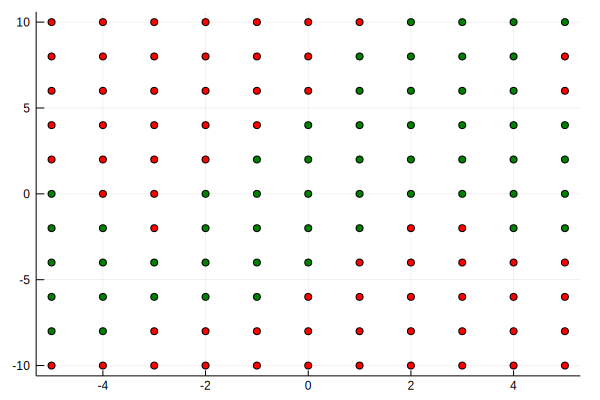

In [84]:
plt = plot(legend=false)
for row in eachrow(table)
    if row[:controller] == "net_mpc"
        success = -π/4 <= row[:qf][3] <= π/4
        scatter!(plt, [row[:v0][1]], [row[:v0][3]], color = success ? "green" : "red")
    end
end
plt

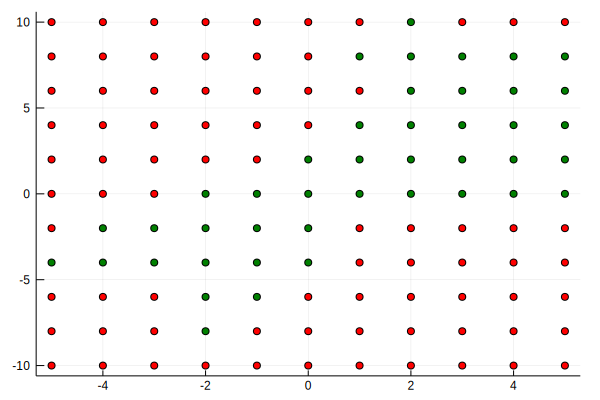

In [85]:
plt = plot(legend=false)
for row in eachrow(table)
    if row[:controller] == "lqr_mpc"
        success = -π/4 <= row[:qf][3] <= π/4
        scatter!(plt, [row[:v0][1]], [row[:v0][3]], color = success ? "green" : "red")
    end
end
plt